In [1]:
using CSV, Plots, LaTeXStrings
cur_colors = get_color_palette(:auto, plot_color(:white));

### Half cut at weak bond

$$
S_{2}^{\mathrm{edge}} = S_{2}^{\mathrm{OBC}} - S_{2}^{\mathrm{PBC}}/2
$$

$$
\delta t>0, A_{\mathrm{OBC}} = A_{\mathrm{OBC}} = [1 : L/2]
$$

$$
\delta t<0, A_{\mathrm{OBC}} = [1 : L/2+1]; A_{\mathrm{OBC}} = [2 : L/2+1]
$$

In [2]:
csv_reader = CSV.File("../data/ED/1d_SSHH_U4.0_L12_nup6_ndn6_PBC.csv", header=0)
l = length(csv_reader)
dt_list = -0.5:0.05:0.5

S2_U4_PBC = zeros(Float64, l)
S2m_U4_PBC = zeros(Float64, l)
S2n_U4_PBC = zeros(Float64, l)

Pm_U4_PBC = zeros(Float64, 13, l)
Pn_U4_PBC = zeros(Float64, 13, l)
P2m_U4_PBC = zeros(Float64, 13, l)
P2n_U4_PBC = zeros(Float64, 13, l)

for i in 1:length(csv_reader)
    S2_U4_PBC[i] = csv_reader[i][1]
    S2m_U4_PBC[i] = csv_reader[i][2]
    S2n_U4_PBC[i] = csv_reader[i][3]

    P2m_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

In [3]:
csv_reader = CSV.File("../data/ED/1d_SSHH_U4.0_L12_nup6_ndn6_OBC.csv", header=0)
l = length(csv_reader)
dt_list = -0.5:0.05:0.5

S2_U4_OBC = zeros(Float64, l)
S2m_U4_OBC = zeros(Float64, l)
S2n_U4_OBC = zeros(Float64, l)

Pm_U4_OBC = zeros(Float64, 15, l)
Pn_U4_OBC = zeros(Float64, 15, l)
P2m_U4_OBC = zeros(Float64, 15, l)
P2n_U4_OBC = zeros(Float64, 15, l)

for i in 1:length(csv_reader)
    S2_U4_OBC[i] = csv_reader[i][1]
    S2m_U4_OBC[i] = csv_reader[i][2]
    S2n_U4_OBC[i] = csv_reader[i][3]

    @views copyto!(P2m_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false)))
    @views copyto!(P2n_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false)))

    @views copyto!(Pm_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false)))
    @views copyto!(Pn_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false)))
end

In [5]:
csv_reader = CSV.File("../data/ED/1d_SSHH_U4.0_dt0_L12_nup6_ndn6_OBC.csv", header=0)
S2_U4_OBC_0 = csv_reader[1][1]
S2m_U4_OBC_0 = csv_reader[1][2]
S2n_U4_OBC_0 = csv_reader[1][3];

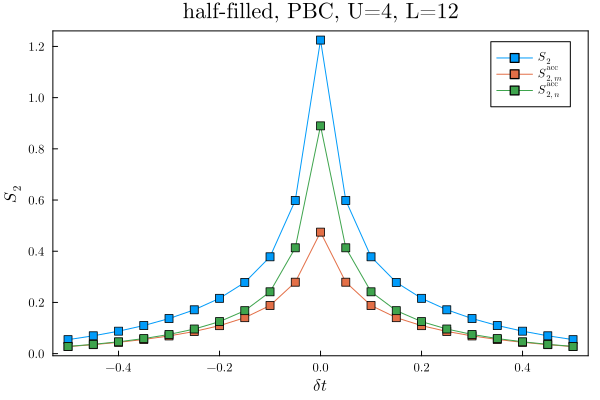

In [6]:
plot(
    dt_list, S2_U4_PBC,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, PBC, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, S2m_U4_PBC,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    -0.5:0.05:0.5, S2n_U4_PBC,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

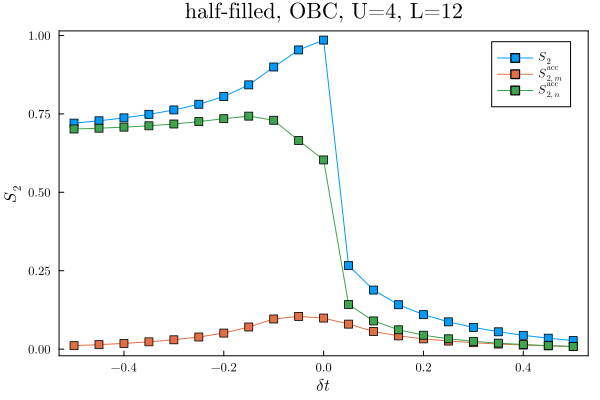

In [7]:
plot(
    dt_list, S2_U4_OBC,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, OBC, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, S2m_U4_OBC,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    -0.5:0.05:0.5, S2n_U4_OBC,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

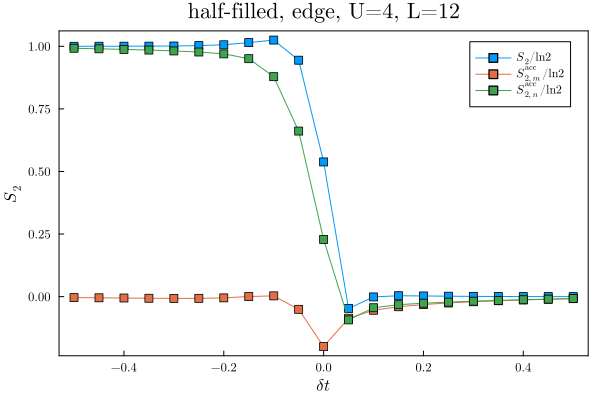

In [10]:
plt = plot(
    dt_list, (S2_U4_OBC - S2_U4_PBC/2) / log(2),
    label = L"S_2 / \ln2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, edge, U=4, L=12",
    mc=cur_colors[1], lc=cur_colors[1],
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    dt_list, (S2m_U4_OBC - S2m_U4_PBC/2) / log(2),
    label = L"S_{2,m}^{\mathrm{acc}} / \ln2",
    mc=cur_colors[2], lc=cur_colors[2],
    marker=(4, :square)
)

plot!(
    dt_list, (S2n_U4_OBC - S2n_U4_PBC/2) / log(2),
    label = L"S_{2,n}^{\mathrm{acc}} / \ln2",
    mc=cur_colors[3], lc=cur_colors[3],
    marker=(4, :square)
)

display(MIME"image/png"(), plt)

In [ ]:
savefig("")

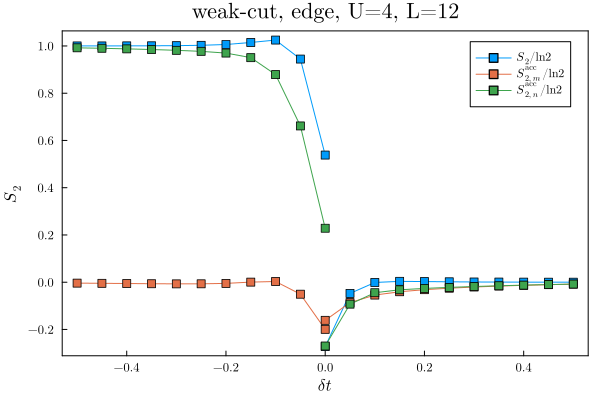

In [9]:
plot(
    dt_list[1:11], (S2_U4_OBC[1:11] - S2_U4_PBC[1:11]/2) / log(2),
    label = L"S_2 / \ln2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="weak-cut, edge, U=4, L=12",
    mc=cur_colors[1], lc=cur_colors[1],
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

s = vcat(S2_U4_OBC_0 - S2_U4_PBC[11]/2, S2_U4_OBC[12:end] - S2_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[1], lc=cur_colors[1]
)

plot!(
    dt_list[1:11], (S2m_U4_OBC[1:11] - S2m_U4_PBC[1:11]/2) / log(2),
    label = L"S_{2,m}^{\mathrm{acc}} / \ln2",
    mc=cur_colors[2], lc=cur_colors[2],
    marker=(4, :square)
)

s = vcat(S2m_U4_OBC_0 - S2m_U4_PBC[11]/2, S2m_U4_OBC[12:end] - S2m_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[2], lc=cur_colors[2]
)

plot!(
    dt_list[1:11], (S2n_U4_OBC[1:11] - S2n_U4_PBC[1:11]/2) / log(2),
    label = L"S_{2,n}^{\mathrm{acc}} / \ln2",
    mc=cur_colors[3], lc=cur_colors[3],
    marker=(4, :square)
)

s = vcat(S2n_U4_OBC_0 - S2n_U4_PBC[11]/2, S2n_U4_OBC[12:end] - S2n_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[3], lc=cur_colors[3]
)

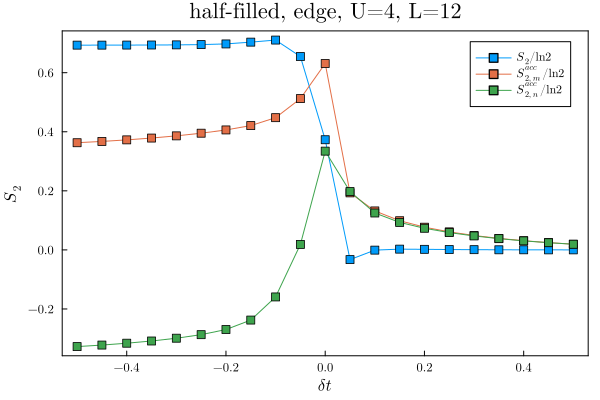

In [9]:
H2m_U4_OBC = S2_U4_OBC - S2m_U4_OBC
H2n_U4_OBC = S2_U4_OBC - S2n_U4_OBC
H2m_U4_PBC = S2_U4_OBC - S2m_U4_PBC
H2n_U4_PBC = S2_U4_OBC - S2n_U4_PBC

plot(
    dt_list, (S2_U4_OBC - S2_U4_PBC/2),
    label = L"S_2 / \ln2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, edge, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, (H2m_U4_OBC - H2m_U4_PBC/2),
    label = L"S_{2,m}^{\mathrm{acc}} / \ln2",
    marker=(4, :square)
)

plot!(
    -0.5:0.05:0.5, (H2n_U4_OBC - H2n_U4_PBC/2),
    label = L"S_{2,n}^{\mathrm{acc}} / \ln2",
    marker=(4, :square)
)

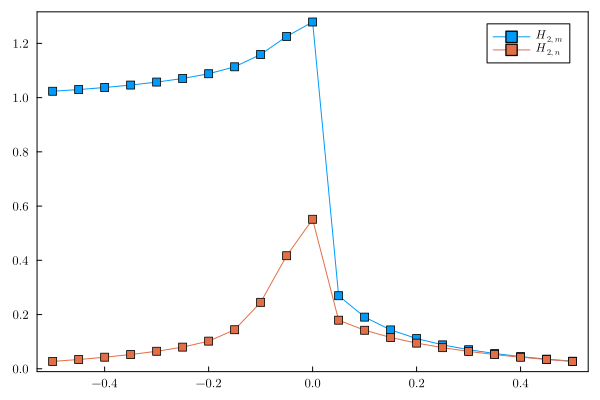

In [10]:
plot(
    -0.5:0.05:0.5, H2m_U4_OBC / log(2),
    label = L"H_{2,m}",
    marker=(4, :square),
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, H2n_U4_OBC / log(2),
    label = L"H_{2,n}",
    marker=(4, :square)
)

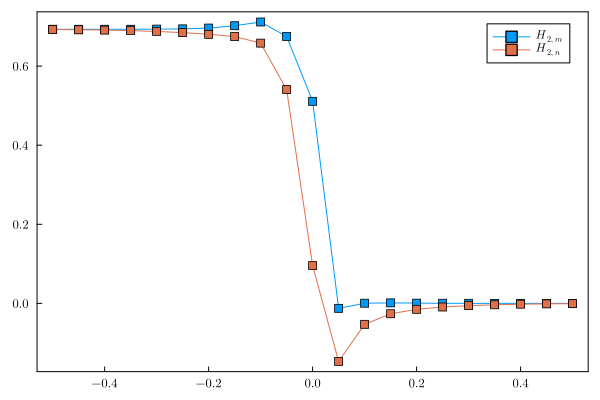

In [11]:
plot(
    -0.5:0.05:0.5, H2m_U4_PBC,
    label = L"H_{2,m}",
    marker=(4, :square),
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, H2n_U4_PBC,
    label = L"H_{2,n}",
    marker=(4, :square)
)

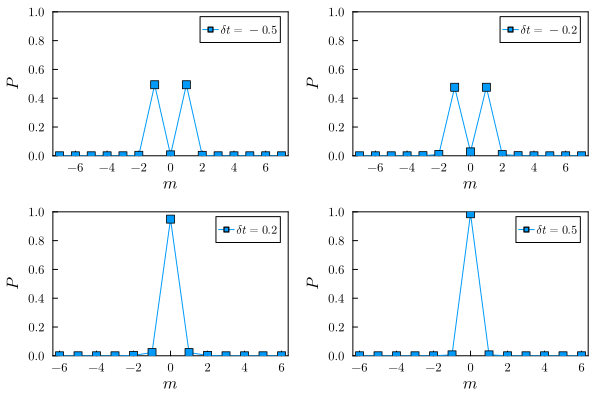

In [12]:
p1 = plot(
    -7:7, Pm_U4_OBC[:, 1],
    label = L"\delta t = -0.5",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    #title="spin distribution, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p2 = plot(
    -7:7, Pm_U4_OBC[:, 7],
    label = L"\delta t = -0.2",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    #title="spin distribution, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p3 = plot(
    -6:6, Pm_U4_OBC[1:13, 15],
    label = L"\delta t = 0.2",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p4 = plot(
    -6:6, Pm_U4_OBC[1:13, 21],
    label = L"\delta t = 0.5",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot(p1, p2, p3, p4, layout=(2,2))

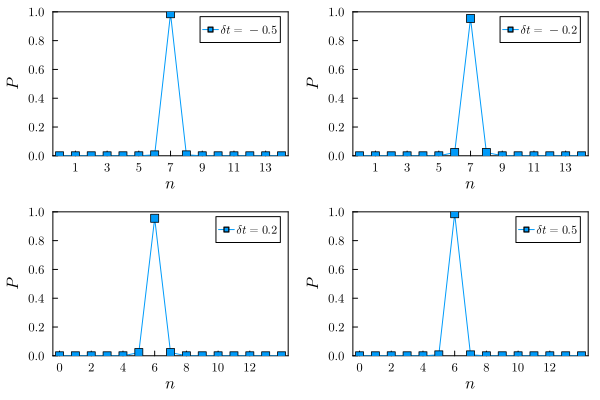

In [13]:
p1 = plot(
    0:14, Pn_U4_OBC[:, 1],
    label = L"\delta t = -0.5",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks = 1:2:13,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p2 = plot(
    0:14,Pn_U4_OBC[:, 7],
    label = L"\delta t = -0.2",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks = 1:2:13,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p3 = plot(
    0:14,Pn_U4_OBC[:, 15],
    label = L"\delta t = 0.2",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks= 0:2:12,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p4 = plot(
    0:14,Pn_U4_OBC[:, 21],
    label = L"\delta t = 0.5",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks= 0:2:12,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot(p1, p2, p3, p4, layout=(2,2))

### Edge Cut

In [14]:
r = 1:11

csv_reader = CSV.File("./data/1d_SSHH_U4.0_dt-0.1_L12_nup6_ndn6_edge.csv", header=0)
l = length(csv_reader)

S2_dtm01 = zeros(Float64, l)
S2m_dtm01 = zeros(Float64, l)
S2n_dtm01 = zeros(Float64, l)

Pm_dtm01 = zeros(Float64, 5, l)
Pn_dtm01 = zeros(Float64, 5, l)
P2m_dtm01 = zeros(Float64, 5, l)
P2n_dtm01 = zeros(Float64, 5, l)

for i in 1:length(csv_reader)
    S2_dtm01[i] = csv_reader[i][1]
    S2m_dtm01[i] = csv_reader[i][2]
    S2n_dtm01[i] = csv_reader[i][3]

    P2m_dtm01[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_dtm01[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_dtm01[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_dtm01[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

csv_reader = CSV.File("./data/1d_SSHH_U4.0_dt0.1_L12_nup6_ndn6_edge.csv", header=0)

S2_dtp01 = zeros(Float64, l)
S2m_dtp01 = zeros(Float64, l)
S2n_dtp01 = zeros(Float64, l)

Pm_dtp01 = zeros(Float64, 5, l)
Pn_dtp01 = zeros(Float64, 5, l)
P2m_dtp01 = zeros(Float64, 5, l)
P2n_dtp01 = zeros(Float64, 5, l)

for i in 1:length(csv_reader)
    S2_dtp01[i] = csv_reader[i][1]
    S2m_dtp01[i] = csv_reader[i][2]
    S2n_dtp01[i] = csv_reader[i][3]

    P2m_dtp01[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_dtp01[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_dtp01[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_dtp01[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

csv_reader = CSV.File("./data/1d_SSHH_U4.0_dt-0.4_L12_nup6_ndn6_edge.csv", header=0)

S2_dtm04 = zeros(Float64, l)
S2m_dtm04 = zeros(Float64, l)
S2n_dtm04 = zeros(Float64, l)

Pm_dtm04 = zeros(Float64, 5, l)
Pn_dtm04 = zeros(Float64, 5, l)
P2m_dtm04 = zeros(Float64, 5, l)
P2n_dtm04 = zeros(Float64, 5, l)

for i in 1:length(csv_reader)
    S2_dtm04[i] = csv_reader[i][1]
    S2m_dtm04[i] = csv_reader[i][2]
    S2n_dtm04[i] = csv_reader[i][3]

    P2m_dtm04[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_dtm04[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_dtm04[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_dtm04[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

csv_reader = CSV.File("./data/1d_SSHH_U4.0_dt0.4_L12_nup6_ndn6_edge.csv", header=0)

S2_dtp04 = zeros(Float64, l)
S2m_dtp04 = zeros(Float64, l)
S2n_dtp04 = zeros(Float64, l)

Pm_dtp04 = zeros(Float64, 5, l)
Pn_dtp04 = zeros(Float64, 5, l)
P2m_dtp04 = zeros(Float64, 5, l)
P2n_dtp04 = zeros(Float64, 5, l)

for i in 1:length(csv_reader)
    S2_dtp04[i] = csv_reader[i][1]
    S2m_dtp04[i] = csv_reader[i][2]
    S2n_dtp04[i] = csv_reader[i][3]

    P2m_dtp04[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_dtp04[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_dtp04[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_dtp04[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

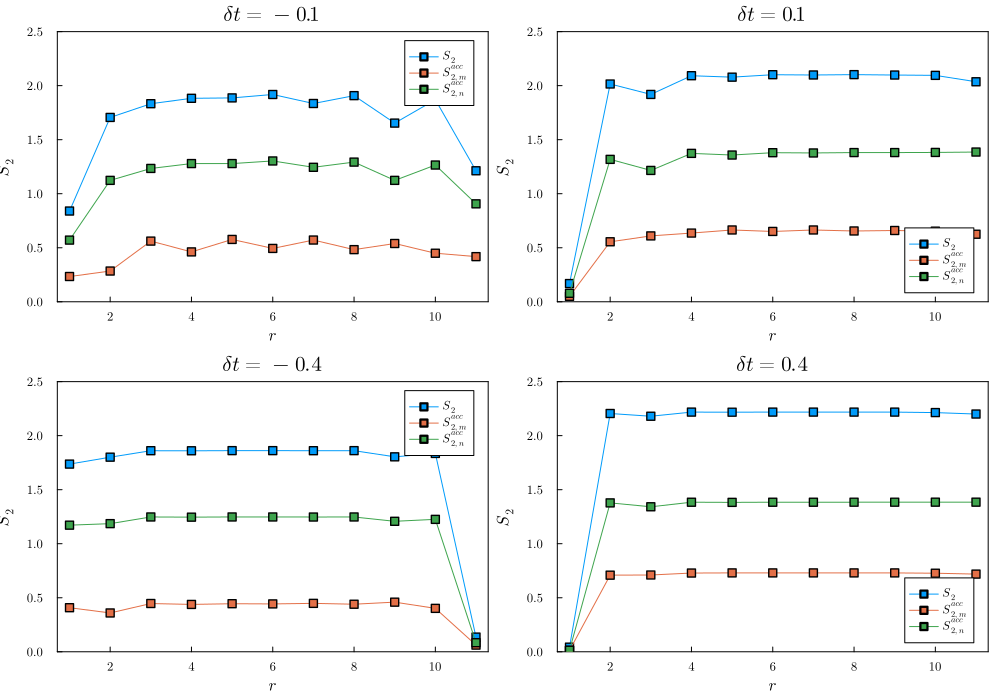

In [15]:
p1 = plot(
    r, S2_dtm01,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"r", ylabel=L"S_2",
    ylim = (0,2.5),
    title=L"\delta t=-0.1",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    p1,
    r, S2m_dtm01,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    p1,
    r, S2n_dtm01,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

p2 = plot(
    r, S2_dtp01,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"r", ylabel=L"S_2",
    ylim = (0,2.5),
    title=L"\delta t=0.1",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    p2,
    r, S2m_dtp01,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    p2,
    r, S2n_dtp01,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

p3 = plot(
    r, S2_dtm04,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"r", ylabel=L"S_2",
    ylim = (0,2.5),
    title=L"\delta t=-0.4",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    p3,
    r, S2m_dtm04,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    p3,
    r, S2n_dtm04,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

p4 = plot(
    r, S2_dtp04,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"r", ylabel=L"S_2",
    ylim = (0,2.5),
    title=L"\delta t=0.4",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    p4,
    r, S2m_dtp04,
    label = L"S_{2,m}^{\mathrm{acc}}",
    marker=(4, :square)
)

plot!(
    p4,
    r, S2n_dtp04,
    label = L"S_{2,n}^{\mathrm{acc}}",
    marker=(4, :square)
)

p=plot(p1, p2, p3, p4, layout=(2,2), size=(1000, 700))
